<a href="https://colab.research.google.com/github/DH-HUB/JODataExploration/blob/main/jodataexploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description**
Ce projet a pour objectif d'explorer les caractéristiques des athlètes participant aux Jeux Olympiques d’hiver, à partir du jeu de données historique des compétitions de 1896 à 2016.
L’analyse se concentre sur l’étude des relations entre les variables quantitatives (âge, taille, poids) et qualitatives (médaille, sexe, sport, pays), à travers des visualisations interactives avec la bibliothèque Plotly.
L’ensemble du travail est orienté vers une compréhension fine des profils types d’athlètes, avec pour finalité la préparation d’un modèle de machine learning permettant de prédire la probabilité pour un athlète de remporter une médaille.


**Problématiques**
Quels sont les profils types d’athlètes qui obtiennent une médaille ?
L’objectif est d’identifier les variables influentes telles que l’âge, le sexe, la taille, ou le sport pratiqué.

Existe-t-il une variation de la morphologie ou de l’âge selon le sport ou le type de médaille ?
Cette question vise à comprendre s’il existe un profil physique récurrent pour certaines disciplines.

Comment les caractéristiques des athlètes ont-elles évolué dans le temps ?
L’idée est de détecter d’éventuelles tendances générationnelles (âge, participation féminine, taille moyenne, etc.).

Certains pays ou sports sont-ils systématiquement surreprésentés parmi les médaillés ?
Cette dernière problématique permet d’explorer les spécialisations nationales ou les biais géographiques liés à la performance.

**Plan du notebook**
Préparation des données

Chargement du fichier

Nettoyage : doublons, valeurs manquantes

Sélection des variables utiles

**Exploration visuelle :**

1- Histogramme avec courbe de densité (KDE) — utilisé pour explorer la
   répartition  d'une variable numérique continue.

2- Violin Plot :Répartition de l’âge par médaille et sexe

3- Boxplot : Analyse de la taille selon le sport

4- Boxplot: Analyse d'évolution de l’âge des athlètes dans le temps par sexe

5- Barres empilées: Comparaison des performances par pays (2012 vs 2016)

Interprétations

Interprétations et storytelling

Analyse graphique intégrée

Profils types et dynamiques visuelles

Ouverture vers la modélisation

Construction de la variable cible HasMedal

Préparation d’un dataset pour le machine learning


In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d akash1vishwakarma/athlete-eventscsv

Dataset URL: https://www.kaggle.com/datasets/akash1vishwakarma/athlete-eventscsv
License(s): unknown


In [ ]:
!unzip athlete-eventscsv.zip

Archive:  athlete-eventscsv.zip
  inflating: athlete_events.csv      


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from IPython.display import display
import pandas as pd

#Chargement du dataset
df = pd.read_csv("athlete_events.csv")

#Affichage des 10 premières lignes
display(df.head(10))

#Affichage des 10 enregistrements les plus anciens
display(df.sort_values(by='Year').head(10))

#Affichage des 10 enregistrements les plus récents
display(df.sort_values(by='Year', ascending=False).head(10))

#Calcul et affichage des moyennes pour les colonnes quantitatives principales
mean_values = df[['Age', 'Height', 'Weight']].mean()
print("\nMoyennes des colonnes quantitatives")
print(mean_values)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
107719,54456,Alexander Viggo Jensen,M,21.0,NaN,NaN,Denmark,DEN,1896 Summer,1896,Summer,Athina,Shooting,"Shooting Men's Military Rifle, 200 metres",NaN
107718,54456,Alexander Viggo Jensen,M,21.0,NaN,NaN,Denmark,DEN,1896 Summer,1896,Summer,Athina,Shooting,"Shooting Men's Free Rifle, Three Positions, 30...",Bronze
148752,74612,Julius Carl Fritz Manteuffel,M,21.0,NaN,62.0,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,NaN
148751,74612,Julius Carl Fritz Manteuffel,M,21.0,NaN,62.0,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Horse Vault,NaN
70204,35741,Gustav Felix Flatow,M,21.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Gold
70203,35741,Gustav Felix Flatow,M,21.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,NaN
221836,111499,Kristian Henrik Rudolf Sjberg,M,21.0,NaN,NaN,Sweden,SWE,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,NaN
148753,74612,Julius Carl Fritz Manteuffel,M,21.0,NaN,62.0,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Gold
24682,12929,John Mary Pius Boland,M,25.0,NaN,NaN,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,Gold
180285,90606,John Bryant Paine,M,25.0,NaN,NaN,United States,USA,1896 Summer,1896,Summer,Athina,Shooting,"Shooting Men's Military Pistol, 25 metres",Gold


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
89007,45126,Hemza Haloui,M,22.0,180.0,96.0,Algeria,ALG,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Heavyweight, Greco-Roman",NaN
235174,117924,Masanao Takahashi,M,34.0,170.0,65.0,Japan,JPN,2016 Summer,2016,Summer,Rio de Janeiro,Equestrianism,"Equestrianism Mixed Dressage, Team",NaN
55010,28193,Clio Emilson Ucha Dias,M,23.0,192.0,90.0,Portugal,POR,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Men's Middleweight,NaN
158762,79712,Martyna Mikoajczak,F,25.0,176.0,57.0,Poland,POL,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Lightweight Double Sculls,NaN
158763,79713,Artur Mikoajczewski,M,26.0,180.0,73.0,Poland,POL,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Double Sculls,NaN
158768,79714,Beata Mikoajczyk,F,30.0,170.0,68.0,Poland,POL,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Women's Kayak Doubles, 500 metres",Bronze
158769,79714,Beata Mikoajczyk,F,30.0,170.0,68.0,Poland,POL,2016 Summer,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Women's Kayak Fours, 500 metres",NaN
54985,28182,Maimouna Diarra,F,25.0,198.0,90.0,Senegal,SEN,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN
235130,117905,Tammy Galera Takagi,F,25.0,161.0,59.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Diving,Diving Women's Synchronized Springboard,NaN
235133,117908,Ayaka Takahashi,F,26.0,165.0,60.0,Japan,JPN,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Women's Doubles,Gold



Moyennes des colonnes quantitatives
Age        25.556898
Height    175.338970
Weight     70.702393
dtype: float64


In [ ]:

#Suppression des doublons
df.drop_duplicates(inplace=True)

#Création d'une variable binaire : a-t-il une médaille ?
df['HasMedal'] = df['Medal'].notna().astype(int)

#Sélection des colonnes pertinentes pour l'analyse
colonnes_utiles = [
    'Name', 'Sex', 'Age', 'Height', 'Weight',
    'Team', 'NOC', 'Sport', 'Event', 'Year', 'Season',
    'City', 'Medal', 'HasMedal'
]
df = df[colonnes_utiles]

#Suppression des lignes avec valeurs manquantes critiques
# (âge, taille, poids sont essentiels pour les profils athlètes)
df_cleaned = df.dropna(subset=['Age', 'Height', 'Weight','Medal'])

# Aperçu du résultat
print(f"Nombre de lignes après nettoyage : {df_cleaned.shape[0]}")
df_cleaned.head()

Nombre de lignes après nettoyage : 30181


,Name,Sex,Age,Height,Weight,Team,NOC,Sport,Event,Year,Season,City,Medal,HasMedal
40,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Ice Hockey,Ice Hockey Men's Ice Hockey,2014,Winter,Sochi,Bronze,1
41,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,Gymnastics,Gymnastics Men's Individual All-Around,1948,Summer,London,Bronze,1
42,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,Gymnastics,Gymnastics Men's Team All-Around,1948,Summer,London,Gold,1
44,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,Gymnastics,Gymnastics Men's Horse Vault,1948,Summer,London,Gold,1
48,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,Gymnastics,Gymnastics Men's Pommelled Horse,1948,Summer,London,Gold,1


In [ ]:
#Statistiques de base
print(df_cleaned[['Age', 'Height', 'Weight']].describe())

#Détection de valeurs aberrantes
mask_aberrant = (df_cleaned['Height'] < 140) | (df_cleaned['Height'] > 230) | \
                (df_cleaned['Weight'] < 30) | (df_cleaned['Weight'] > 200) | \
                (df_cleaned['Age'] < 10) | (df_cleaned['Age'] > 60)

print(f"Nombre de lignes suspectes : {mask_aberrant.sum()}")
df_cleaned[mask_aberrant].head()


                Age        Height        Weight
count  30181.000000  30181.000000  30181.000000
mean      25.429012    177.642358     73.753554
std        5.049684     10.924188     15.004992
min       13.000000    136.000000     28.000000
25%       22.000000    170.000000     63.000000
50%       25.000000    178.000000     73.000000
75%       28.000000    185.000000     83.000000
max       66.000000    223.000000    182.000000
Nombre de lignes suspectes : 15


,Name,Sex,Age,Height,Weight,Team,NOC,Sport,Event,Year,Season,City,Medal,HasMedal
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,Gymnastics,Gymnastics Women's Team All-Around,2004,Summer,Athina,Gold,1
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,Gymnastics,Gymnastics Women's Team All-Around,2000,Summer,Sydney,Gold,1
69216,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,Gymnastics,Gymnastics Women's Team All-Around,1976,Summer,Montreal,Gold,1
69222,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,Gymnastics,Gymnastics Women's Team All-Around,1980,Summer,Moskva,Gold,1
69225,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,Gymnastics,Gymnastics Women's Uneven Bars,1980,Summer,Moskva,Bronze,1


In [ ]:
#Supprimer les 15 lignes aberrantes
df_cleaned = df_cleaned[~mask_aberrant]
print(f"Nombre de lignes après suppression des valeurs aberrantes : {df_cleaned.shape[0]}")

Nombre de lignes après suppression des valeurs aberrantes : 30166


**Histogramme avec courbe de densité (KDE) — utilisé pour explorer la répartition  d'une variable numérique continue**

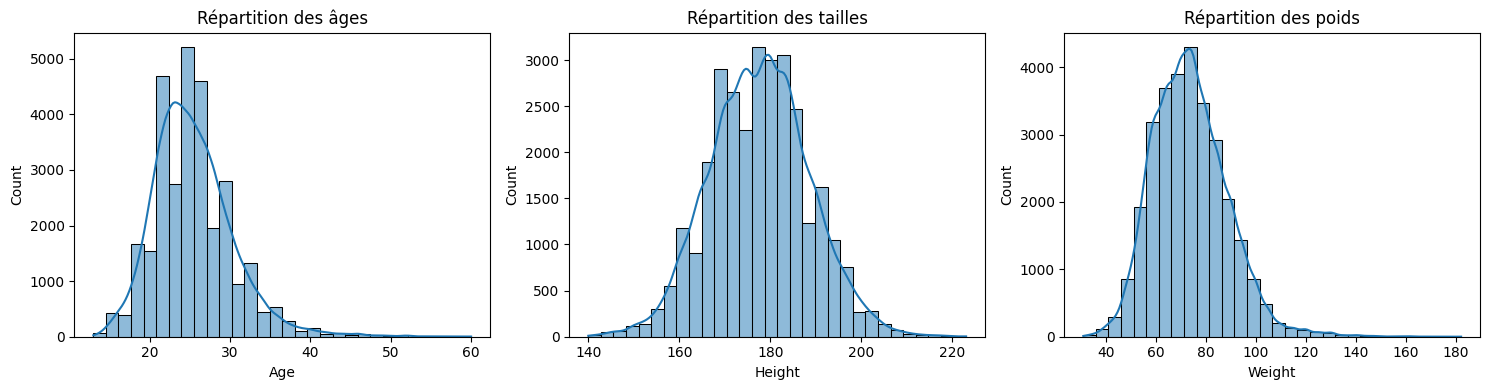

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(df_cleaned['Age'], bins=30, kde=True, ax=axs[0])
axs[0].set_title("Répartition des âges")

sns.histplot(df_cleaned['Height'], bins=30, kde=True, ax=axs[1])
axs[1].set_title("Répartition des tailles")

sns.histplot(df_cleaned['Weight'], bins=30, kde=True, ax=axs[2])
axs[2].set_title("Répartition des poids")

plt.tight_layout()
plt.show()

#Vérification visuelle du nettoyage des données :
#La répartition des âges montre une concentration réaliste entre 18 et 30 ans,
#avec suppression réussie des valeurs extrêmes <10 ou >60 ans.
#La taille suit une distribution normale centrée,
#sans valeurs aberrantes visibles.
#Le poids présente une asymétrie logique (sports à poids variables), avec une concentration entre
#60 et 90 kg et aucune valeur extrême >200 kg. Le nettoyage des variables numériques est validé, les données sont prêtes pour l'analyse ou la modélisation.

In [ ]:
#Réinitialisation de l'index
df_cleaned.reset_index(drop=True, inplace=True)

**Violin Plot :Répartition de l’âge par médaille et sexe**



In [ ]:
import plotly.graph_objects as go
from IPython.display import display, Markdown
import pandas as pd

#Fonction de storytelling affiché sous le graphique
def afficher_storytelling(titre, insight, impact, hypothese):
    texte = f"""
### 📌 {titre}
- **Insight** : {insight}
- **Impact** : {impact}
- **Hypothèse / Action** : {hypothese}
"""
    display(Markdown(texte))

#Données filtrées
df_winter = df_cleaned[df_cleaned['Season'] == 'Winter'].copy()

#Ajouter une colonne pour x virtuel
df_winter['Group'] = df_winter['Medal'] + " - " + df_winter['Sex']

#Ordre personnalisé pour affichage
group_order = ['Gold - M', 'Gold - F', 'Silver - M', 'Silver - F', 'Bronze - M', 'Bronze - F']
color_map = {'M': 'blue', 'F': 'red'}

#Création du graphique avec Violin côte à côte
fig = go.Figure()

for group in group_order:
    medal, sex = group.split(" - ")
    filtered = df_winter[df_winter['Group'] == group]
    fig.add_trace(go.Violin(
        x=[group] * len(filtered),
        y=filtered['Age'],
        name=group,
        box_visible=True,
        meanline_visible=True,
        line_color=color_map[sex],
        width=0.5,
        points='outliers'
    ))

#Mise en page propre
fig.update_layout(
    title="Distribution de l'âge par médaille et par sexe (JO d'hiver) — affichage côte à côte",
    yaxis_title="Âge",
    xaxis_title="Médaille et sexe",
    xaxis=dict(
        tickmode='array',
        tickvals=group_order,
        ticktext=['Gold - H', 'Gold - F', 'Silver - H', 'Silver - F', 'Bronze - H', 'Bronze - F']
    ),
    height=600,
    violinmode='group'
)

fig.show()

#Bloc interprétation dynamique
medians = df_winter.groupby('Sex')['Age'].median().to_dict()
means = df_winter.groupby('Sex')['Age'].mean().round().astype(int).to_dict()

insight_text = (
    f"Médiane d'âge : {medians.get('M', 0):.0f} ans chez les hommes, {medians.get('F', 0):.0f} ans chez les femmes. "
    f"Moyenne : {means.get('M', 0)} ans (H) vs {means.get('F', 0)} ans (F)."
)
impact_text = (
    "Les femmes décrochent leurs médailles un peu plus jeunes, ce qui peut indiquer un pic de performance plus précoce."
)
hypothese_text = (
    "Les modèles prédictifs devraient intégrer un croisement âge × sexe pour mieux anticiper les performances selon le genre."
)

afficher_storytelling(
    titre="Lecture stratégique des profils d’âge",
    insight=insight_text,
    impact=impact_text,
    hypothese=hypothese_text
)



### 📌 Lecture stratégique des profils d’âge
- **Insight** : Médiane d'âge : 26 ans chez les hommes, 25 ans chez les femmes. Moyenne : 26 ans (H) vs 25 ans (F).
- **Impact** : Les femmes décrochent leurs médailles un peu plus jeunes, ce qui peut indiquer un pic de performance plus précoce.
- **Hypothèse / Action** : Les modèles prédictifs devraient intégrer un croisement âge × sexe pour mieux anticiper les performances selon le genre.


**Boxplot : Analyse de la taille selon le sport**

In [ ]:
import plotly.express as px
from IPython.display import display, Markdown

#Fonction de storytelling réutilisable
def afficher_storytelling(titre, insight, impact, hypothese):
    texte = f"""
### 📌 {titre}
- **Insight** : {insight}
- **Impact** : {impact}
- **Hypothèse / Action** : {hypothese}
"""
    display(Markdown(texte))

#Boxplot taille par sport et sexe
df_winter = df_cleaned[df_cleaned['Season'] == 'Winter']

fig = px.box(
    df_winter,
    x='Sport',
    y='Height',
    color='Sex',
    title="Taille des athlètes par sport et par sexe (JO d'hiver)",
    labels={'Height': 'Taille (cm)', 'Sport': 'Sport'}
)

fig.update_layout(xaxis_tickangle=45, height=600)
fig.show()

#Résumé dynamique pour storytelling
#Moyennes de taille par sexe
taille_moy = df_winter.groupby('Sex')['Height'].mean().round(1).to_dict()
taille_max_sport = df_winter.groupby('Sport')['Height'].mean().sort_values(ascending=False).head(1)

sport_max = taille_max_sport.index[0]
height_max = round(taille_max_sport.values[0])

#Texte généré automatiquement
insight_text = (
    f"La taille moyenne des hommes est de {taille_moy.get('M', 0)} cm, celle des femmes est de {taille_moy.get('F', 0)} cm. "
    f"Le sport avec les athlètes les plus grands est le **{sport_max}** avec une moyenne de {height_max} cm."
)
impact_text = (
    "Certains sports, comme le ski de fond ou le hockey sur glace, présentent une forte différenciation morphologique, "
    "ce qui pourrait influencer les critères de sélection ou de spécialisation."
)
hypothese_text = (
    "Le modèle prédictif pourrait intégrer la variable 'taille' comme critère différenciateur selon le sport et le sexe."
)

afficher_storytelling(
    titre="Analyse morphologique par discipline",
    insight=insight_text,
    impact=impact_text,
    hypothese=hypothese_text
)



### 📌 Analyse morphologique par discipline
- **Insight** : La taille moyenne des hommes est de 180.0 cm, celle des femmes est de 167.4 cm. Le sport avec les athlètes les plus grands est le **Bobsleigh** avec une moyenne de 182 cm.
- **Impact** : Certains sports, comme le ski de fond ou le hockey sur glace, présentent une forte différenciation morphologique, ce qui pourrait influencer les critères de sélection ou de spécialisation.
- **Hypothèse / Action** : Le modèle prédictif pourrait intégrer la variable 'taille' comme critère différenciateur selon le sport et le sexe.


**Boxplot: Analyse d'évolution de l’âge des athlètes dans le temps par sexe**

In [ ]:
import plotly.express as px
from IPython.display import display, Markdown

#Fonction de storytelling réutilisable
def afficher_storytelling(titre, insight, impact, hypothese):
    texte = f"""
### 📌 {titre}
- **Insight** : {insight}
- **Impact** : {impact}
- **Hypothèse / Action** : {hypothese}
"""
    display(Markdown(texte))

#Graphique : Evolution de l’âge des athlètes dans le temps JO d'hiver
df_winter = df_cleaned[df_cleaned['Season'] == 'Winter']

fig = px.box(
    df_winter,
    x='Year',
    y='Age',
    color='Sex',
    title="Évolution de l'âge des athlètes dans le temps (JO d'hiver)",
    labels={'Age': 'Âge', 'Year': 'Année', 'Sex': 'Sexe'}
)

fig.update_layout(xaxis_tickangle=45, height=600)
fig.show()

#Calculs dynamiques pour storytelling
#Moyenne d’âge par année et par sexe
mean_age_by_year_sex = df_winter.groupby(['Year', 'Sex'])['Age'].mean().unstack()

#Evolution de l'âge moyen pour chaque sexe entre la première et la dernière année
first_year = mean_age_by_year_sex.index.min()
last_year = mean_age_by_year_sex.index.max()

evo_m = mean_age_by_year_sex.loc[last_year, 'M'] - mean_age_by_year_sex.loc[first_year, 'M']
evo_f = mean_age_by_year_sex.loc[last_year, 'F'] - mean_age_by_year_sex.loc[first_year, 'F']

#Texte dynamiquement adapté selon les tendances
insight_text = (
    f"Sur la période analysée ({first_year} → {last_year}), l'âge moyen des hommes a "
    f"{'augmenté' if evo_m > 0 else 'diminué'} de {abs(evo_m):.1f} ans, "
    f"et celui des femmes a {'augmenté' if evo_f > 0 else 'diminué'} de {abs(evo_f):.1f} ans."
)

impact_text = (
    "L’évolution de l’âge moyen peut révéler un changement dans les profils ciblés ou une évolution de la longévité sportive, "
    "notamment influencée par les progrès en préparation physique et médicalisation du sport."
)

hypothese_text = (
    "Le modèle pourrait intégrer une variable 'année' ou 'période historique' pour capturer des effets temporels générationnels."
)

afficher_storytelling(
    titre="Tendances temporelles sur l'âge des athlètes",
    insight=insight_text,
    impact=impact_text,
    hypothese=hypothese_text
)






### 📌 Tendances temporelles sur l'âge des athlètes
- **Insight** : Sur la période analysée (1924 → 2014), l'âge moyen des hommes a diminué de 0.7 ans, et celui des femmes a diminué de 13.2 ans.
- **Impact** : L’évolution de l’âge moyen peut révéler un changement dans les profils ciblés ou une évolution de la longévité sportive, notamment influencée par les progrès en préparation physique et médicalisation du sport.
- **Hypothèse / Action** : Le modèle pourrait intégrer une variable 'année' ou 'période historique' pour capturer des effets temporels générationnels.


**Barres empilées: Comparaison des performances par pays 2012 vs 2016**

In [ ]:
import plotly.express as px
from IPython.display import display, Markdown

#Fonction de storytelling
def afficher_storytelling(titre, insight, impact, hypothese):
    texte = f"""
### 📌 {titre}
- **Insight** : {insight}
- **Impact** : {impact}
- **Hypothèse / Action** : {hypothese}
"""
    display(Markdown(texte))

#Données : médaille uniquement et années ciblées
df_medals = df_cleaned[df_cleaned['Medal'].notna()]
annees_comparaison = [2012, 2016]
df_compare = df_medals[df_medals['Year'].isin(annees_comparaison)]

#Préparation des données pour le top 15
df_grouped = df_compare.groupby(['Team', 'Year'])['Medal'].count().reset_index(name='Médailles')
top_pays = df_grouped.groupby('Team')['Médailles'].sum().nlargest(15).index
df_top = df_grouped[df_grouped['Team'].isin(top_pays)]

#Visualisation
fig = px.bar(df_top,
             x='Team',
             y='Médailles',
             color='Year',
             barmode='group',
             title="Top 15 des pays les plus médaillés en 2012 et 2016 – Comparaison des performances",
             labels={'Team': 'Pays', 'Médailles': 'Nombre de médailles', 'Year': 'Année'})

fig.update_layout(xaxis_tickangle=45, height=600)
fig.show()

#Storytelling dynamique
#Pays en tête
top_pays_totaux = df_grouped.groupby('Team')['Médailles'].sum().sort_values(ascending=False).head(3)

pays_1 = top_pays_totaux.index[0]
nb_1 = top_pays_totaux.iloc[0]
pays_2 = top_pays_totaux.index[1]
pays_3 = top_pays_totaux.index[2]

insight_text = (
    f"{pays_1} arrive en tête avec {nb_1} médailles cumulées sur les deux éditions, suivi de {pays_2} et {pays_3}. "
    f"Ces pays montrent une constance de performance olympique hivernale."
)
impact_text = (
    "Cette stabilité peut s'expliquer par des politiques sportives solides et une spécialisation dans les disciplines dominantes."
)
hypothese_text = (
    "On pourrait inclure la variable 'Team' dans une analyse prédictive ou clusterisation pour comprendre les profils pays-types."
)

#Affichage du storytelling
afficher_storytelling(
    titre="Comparaison de performance entre nations aux JO d’hiver",
    insight=insight_text,
    impact=impact_text,
    hypothese=hypothese_text
)



### 📌 Comparaison de performance entre nations aux JO d’hiver
- **Insight** : United States arrive en tête avec 493 médailles cumulées sur les deux éditions, suivi de Great Britain et Russia. Ces pays montrent une constance de performance olympique hivernale.
- **Impact** : Cette stabilité peut s'expliquer par des politiques sportives solides et une spécialisation dans les disciplines dominantes.
- **Hypothèse / Action** : On pourrait inclure la variable 'Team' dans une analyse prédictive ou clusterisation pour comprendre les profils pays-types.
